In [1]:
import pandas as pd

In [2]:
from tools.fm_attributes import Attributes
from tools import lineup_tpr

In [3]:
players_df = pd.read_csv("players_db/fm23/fm23db_processed.csv").sort_values("tpr_Best", ascending=False)
team_df = pd.read_csv("players_db/fm23/team_ratings.csv").sort_values("tpr", ascending=False)

In [4]:
raw_df = players_df
raw_df.columns = [col.strip() for col in raw_df.columns]
raw_df.Club = [col.strip() for col in raw_df.Club]

In [5]:
lin11=lineup_tpr.LineupTPR(players_df,"Liverpool",print_lineup=True,show_squad=False)

                         Name Best_Pos  tpr Playing_Position
3201                  Alisson       GK   88               GK
3237   Trent Alexander-Arnold      WBR   84               DR
3198          Virgil van Dijk       DC   87               DC
3350          Kostas Tsimikas      WBL   83               DL
3217                  Fabinho       DM   84               DC
3232         Jordan Henderson       DM   85               MC
3210                   Thiago       MC   86               MC
3327  Alex Oxlade-Chamberlain       MC   81              AMC
3194            Mohamed Salah      AMR   89              AML
3220          Roberto Firmino       ST   83              AMR
3451             Darwin Núñez       ST   82               ST


In [6]:
players_df.head(10)[["Name","tpr_Best","Age","Predicted_Market_Value"]]

,Name,tpr_Best,Age,Predicted_Market_Value
3,Manuel Neuer,75,36,115145609
4164,Robert Lewandowski,75,33,119927559
3193,Erling Haaland,74,21,163261340
3195,Harry Kane,74,28,91986000
4172,Marc-André ter Stegen,73,30,69317115
3197,Bernardo Silva,73,27,92091947
3192,Kevin De Bruyne,73,30,139002408
3194,Mohamed Salah,73,30,144950592
4165,Luka Modrić,72,36,99224081
3213,Bruno Fernandes,72,27,110941101


In [7]:
players_df.iloc[0][-27:]

Min_Value                               NaN
Max_Value                               NaN
Market_Value                    115145609.0
Player_Role               GK_Sweeper Keeper
Pos_Rank                                  0
gk                                       75
tpr_general                              64
tpr                                      92
tpr_DM                                   41
tpr_AML                                  41
tpr_AMC                                  42
tpr_GK                                   99
tpr_MC                                   41
tpr_DC                                   41
tpr_AMR                                  42
tpr_DL                                   42
tpr_DR                                   42
tpr_ST                                   42
tpr_ML                                   41
tpr_MR                                   41
tpr_WBR                                  41
tpr_WBL                                  41
tpr_Best                        

In [8]:
list(players_df.columns
)

['UID',
 'Inf',
 'Name',
 'DoB',
 'Nat',
 'Division',
 'Club',
 'Based',
 'Preferred Foot',
 'Right Foot',
 'Left Foot',
 'Position',
 'Height',
 'Weight',
 'Age',
 'Transfer Value',
 'Wage',
 'AT Apps',
 'AT Gls',
 'Team',
 'Caps',
 'Yth Apps',
 'Style',
 'Rc Injury',
 'Best_Role',
 'Best Duty',
 'Best_Pos',
 'Acceleration',
 'Aerial_Reach',
 'Aggression',
 'Agility',
 'Anticipation',
 'Balance',
 'Bravery',
 'Command_of_Area',
 'Communication',
 'Composure',
 'Concentration',
 'Corners',
 'Crossing',
 'Decisions',
 'Determination',
 'Dribbling',
 'Eccentricity',
 'Finishing',
 'First_Touch',
 'Flair',
 'Free_Kick_Taking',
 'Handling',
 'Heading',
 'Jumping_Reach',
 'Kicking',
 'Leadership',
 'Long_Shots',
 'Long_Throws',
 'Marking',
 'Natural_Fitness',
 'Off_the_Ball',
 'One_on_Ones',
 'Pace',
 'Passing',
 'Penalty_Taking',
 'Positioning',
 'Punching',
 'Reflexes',
 'Rushing_Out',
 'Stamina',
 'Strength',
 'Tackling',
 'Teamwork',
 'Technique',
 'Throwing',
 'Vision',
 'Work_Rate',
 

In [9]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

In [16]:
# Define functions for every action and its outcomes

def shot():
    return {
        "on_target": shot_on_target(),
        "off_target": shot_off_target()
    }

def shot_on_target():
    return {
        "goal": shot_goal(),
        "save": shot_save(),
        "woodwork": shot_woodwork()
    }

def shot_goal():
    return {
        "normal": "Goal scored with a normal shot",
        "volley": "Goal scored with a volley",
        "curved": "Goal scored with a curved shot",
        "bicycle": "Goal scored with a bicycle kick",
        "header": "Goal scored with a header",
        "dead_ball": dead_ball_shot()
    }

def dead_ball_shot():
    return {
        "penalty": "Penalty kick goal",
        "freekick": "Freekick goal"
    }

def shot_save():
    return {
        "save_out": "Goalkeeper saves and sends the ball out",
        "save_handle": "Goalkeeper handles the ball",
        "post_save": shot_post_save()
    }

def shot_post_save():
    return {
        "shot": "Reattempt shot after the save",
        "out_set_pieces": "Out for a set piece",
        "goal_kick": "Goalkeeper restarts with a goal kick",
        "clearance": "Clearance by defender",
        "offside": "Offside position, no goal"
    }

def shot_woodwork():
    return {
        "out": "Ball hits the woodwork and goes out of bounds",
        "continue": "Ball hits the woodwork but play continues"
    }

def shot_off_target():
    return {
        "out": "Ball goes out of bounds",
        "blocked": shot_blocked()
    }

def shot_blocked():
    return {
        "foul_handball": "Handball committed, free kick awarded",
        "continue": "Play continues"
    }

def pass_action():
    return {
        "success": pass_success(),
        "fail": pass_fail()
    }

def pass_success():
    return {
        "live_ball": "Ball is still in play",
        "dead_ball": "Ball goes out of play"
    }

def pass_fail():
    return {
        "handball": "Handball committed, free kick awarded"
    }

def foul_action():
    return {
        "dead_ball_foul": "Foul committed when the ball is dead"
    }

def out_action():
    return {
        "throw": "Throw in for the opposing team",
        "goal_kick": "Goal kick awarded",
        "dead_ball_out": "Out of bounds, dead ball situation"
    }

# More detailed actions and outcomes

def clearance():
    return {
        "clear_to_touchline": "Ball cleared to touchline",
        "clear_to_midfield": "Ball cleared to midfield"
    }

def defender_recovery():
    return {
        "regain_possession": "Defender regains possession",
        "clear_ball": "Defender clears the ball"
    }

def defender_action():
    return {
        "pressure_ball": pressure_ball(),
        "intercept_pass": intercept_pass()
    }

def pressure_ball():
    return {
        "win_ball": "Defender wins the ball",
        "foul": "Foul committed while pressuring the ball"
    }

def intercept_pass():
    return {
        "pass_to_teammate": "Pass intercepted and given to teammate",
        "counter_attack": "Counter-attack after interception"
    }

def attack_action():
    return {
        "cross": cross_action(),
        "through_pass": through_pass()
    }

def cross_action():
    return {
        "header": "Attempted header from cross",
        "volley": "Attempted volley from cross"
    }

def through_pass():
    return {
        "finish": "Teammate finishes the pass with a shot",
        "continue_dribble": "Teammate continues dribbling the ball"
    }

def track_back():
    return {
        "pressure_ball": "Tracking back to pressure the ball",
        "interception": "Tracking back to intercept the pass"
    }

# Function to print the action tree recursively
def print_tree(action_func, indent=0):
    action_dict = action_func()
    for key, value in action_dict.items():
        print(' ' * indent + f"{key}: {value}")
        if isinstance(value, dict):  # Check if it's a dictionary (sub-action)
            print_tree(lambda: value, indent + 2)

# Example: Print the shot action outcome tree
print_tree(shot)

# Example: Print the pass action outcome tree
print_tree(pass_action)

# Example: Print the foul action outcome tree
print_tree(foul_action)

# Example: Print the out action outcome tree
print_tree(out_action)

# Example: Print defender action outcome tree
print_tree(defender_action)

# Example: Print attack action outcome tree
print_tree(attack_action)


on_target: {'goal': {'normal': 'Goal scored with a normal shot', 'volley': 'Goal scored with a volley', 'curved': 'Goal scored with a curved shot', 'bicycle': 'Goal scored with a bicycle kick', 'header': 'Goal scored with a header', 'dead_ball': {'penalty': 'Penalty kick goal', 'freekick': 'Freekick goal'}}, 'save': {'save_out': 'Goalkeeper saves and sends the ball out', 'save_handle': 'Goalkeeper handles the ball', 'post_save': {'shot': 'Reattempt shot after the save', 'out_set_pieces': 'Out for a set piece', 'goal_kick': 'Goalkeeper restarts with a goal kick', 'clearance': 'Clearance by defender', 'offside': 'Offside position, no goal'}}, 'woodwork': {'out': 'Ball hits the woodwork and goes out of bounds', 'continue': 'Ball hits the woodwork but play continues'}}
  goal: {'normal': 'Goal scored with a normal shot', 'volley': 'Goal scored with a volley', 'curved': 'Goal scored with a curved shot', 'bicycle': 'Goal scored with a bicycle kick', 'header': 'Goal scored with a header', 'de

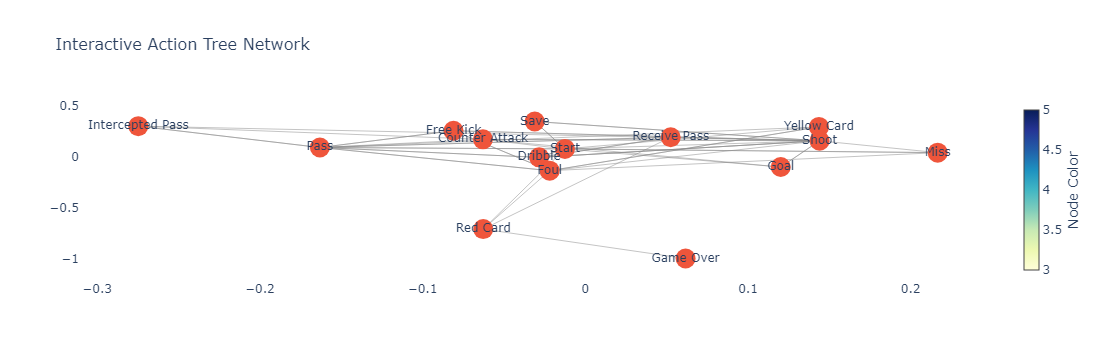

In [18]:
# Define Action Classes
class Action:
    def __init__(self, action, description):
        self.action = action
        self.description = description
        self.next_actions = []

    def add_next_action(self, next_action):
        self.next_actions.append(next_action)

    def __str__(self):
        return f"{self.action}: {self.description}"


class Shot:
    class OnTarget:
        def __init__(self):
            self.goal = Action(
                "Goal scored", "A goal is scored, either by a foot or head or set-piece."
            )
            self.save = Action(
                "Goalkeeper save", "The goalkeeper saves the shot, resulting in a new action."
            )

        def add_goal_actions(self):
            self.goal.add_next_action("kickoff")
            self.goal.add_next_action("opposition_possession")
        
        def add_save_actions(self):
            self.save.add_next_action("out_of_bounds")
            self.save.add_next_action("free_kick")
            self.save.add_next_action("goal_kick")
            self.save.add_next_action("opposition_possession")

    class OffTarget:
        def __init__(self):
            self.out = Action("Ball goes out of bounds", "Ball crosses sideline or goal line.")
            self.blocked = Action("Ball blocked", "The ball is blocked but play continues.")
            self.woodwork = Action("Hits the woodwork", "Ball hits the post or crossbar.")

        def add_out_actions(self):
            self.out.add_next_action("out_of_bounds")

        def add_blocked_actions(self):
            self.blocked.add_next_action("play_continues")
            self.blocked.add_next_action("free_kick")

        def add_woodwork_actions(self):
            self.woodwork.add_next_action("goal_kick")
            self.woodwork.add_next_action("play_continues")


class Pass:
    class Success:
        def __init__(self):
            self.live_ball = Action("Pass completed", "Ball remains in play after successful pass.")
            self.dead_ball = Action("Pass out of play", "The pass goes out of bounds.")

        def add_live_ball_actions(self):
            self.live_ball.add_next_action("play_continues")
            self.live_ball.add_next_action("possession_change")
            self.live_ball.add_next_action("shot")
            self.live_ball.add_next_action("goal")

        def add_dead_ball_actions(self):
            self.dead_ball.add_next_action("set_piece")

    class Fail:
        def __init__(self):
            self.handball = Action("Handball foul", "Player commits a handball, free kick awarded.")
            self.miss = Action("Pass missed", "Pass goes out of bounds.")

        def add_handball_actions(self):
            self.handball.add_next_action("free_kick")
            self.handball.add_next_action("opposition_possession")

        def add_miss_actions(self):
            self.miss.add_next_action("out_of_bounds")


class Out:
    def __init__(self):
        self.throw = Action("Throw-in awarded", "Ball crosses sideline, throw-in awarded to the other team.")
        self.goal_kick = Action("Goal kick awarded", "The ball crosses the goal line without a goal.")
        self.dead_ball_out = Action("Out of bounds", "The ball is out of bounds and a restart is needed.")

    def add_throw_actions(self):
        self.throw.add_next_action("opposition_throw_in")
        self.throw.add_next_action("possession_change")

    def add_goal_kick_actions(self):
        self.goal_kick.add_next_action("opposition_goal_kick")
        self.goal_kick.add_next_action("possession_change")

    def add_dead_ball_out_actions(self):
        self.dead_ball_out.add_next_action("set_piece")


# Example of creating a shot action and handling its outcomes
shot_on_target = Shot.OnTarget()
shot_on_target.add_goal_actions()
shot_on_target.add_save_actions()

# Example of creating a pass action and handling its outcomes
pass_success = Pass.Success()
pass_success.add_live_ball_actions()
pass_success.add_dead_ball_actions()

# Example of creating an out action and handling its outcomes
out_action = Out()
out_action.add_throw_actions()
out_action.add_goal_kick_actions()
out_action.add_dead_ball_out_actions()

# Display results for each action (for debugging or testing)
print(shot_on_target.goal.action, shot_on_target.goal.next_actions)
print(shot_on_target.save.action, shot_on_target.save.next_actions)
print(pass_success.live_ball.action, pass_success.live_ball.next_actions)
print(pass_success.dead_ball.action, pass_success.dead_ball.next_actions)
print(out_action.throw.action, out_action.throw.next_actions)
print(out_action.goal_kick.action, out_action.goal_kick.next_actions)
